## Positional Encoding

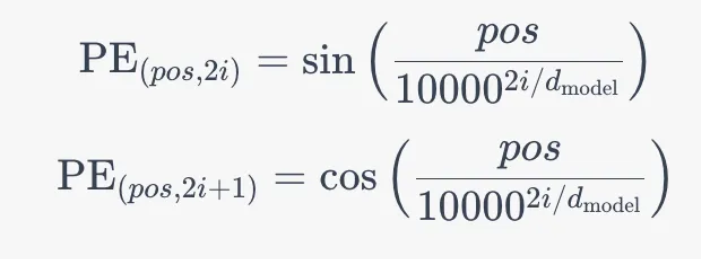

+ Here, pos represents the word’s position in the sequence, i corresponds to the dimension within the embedding, and d_model is the dimensionality of the model’s embeddings.

In [1]:
import torch
import torch.nn as nn

max_seq_length = 10
d_model = 6


### The Positional Encoding formula can be Rewritten as ...
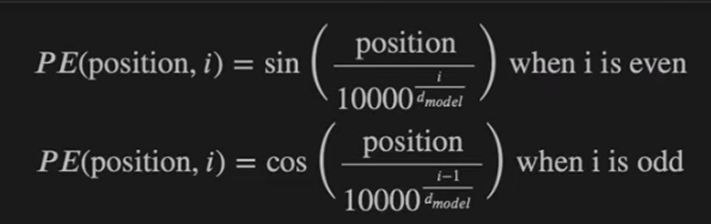


In [2]:
even_i = torch.arange(0,d_model,2).float()
even_i

tensor([0., 2., 4.])

In [4]:
even_denominator = torch.pow(10000,even_i/d_model)
even_denominator

tensor([  1.0000,  21.5443, 464.1590])

In [6]:
odd_i = torch.arange(1,d_model,2).float()
odd_i 

tensor([1., 3., 5.])

In [7]:
odd_denominator = torch.pow(10000,odd_i/d_model)
odd_denominator

tensor([   4.6416,  100.0000, 2154.4343])

In [8]:
denominator = even_denominator

In [10]:
position = torch.arange(max_seq_length, dtype=torch.float)
position

tensor([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

In [12]:
position = position.reshape(max_seq_length,1)
position

tensor([[0.],
        [1.],
        [2.],
        [3.],
        [4.],
        [5.],
        [6.],
        [7.],
        [8.],
        [9.]])

In [14]:
even_pe = torch.sin(position/ denominator)
odd_pe = torch.cos(position/denominator)

In [15]:
even_pe

tensor([[ 0.0000,  0.0000,  0.0000],
        [ 0.8415,  0.0464,  0.0022],
        [ 0.9093,  0.0927,  0.0043],
        [ 0.1411,  0.1388,  0.0065],
        [-0.7568,  0.1846,  0.0086],
        [-0.9589,  0.2300,  0.0108],
        [-0.2794,  0.2749,  0.0129],
        [ 0.6570,  0.3192,  0.0151],
        [ 0.9894,  0.3629,  0.0172],
        [ 0.4121,  0.4057,  0.0194]])

In [16]:
odd_pe

tensor([[ 1.0000,  1.0000,  1.0000],
        [ 0.5403,  0.9989,  1.0000],
        [-0.4161,  0.9957,  1.0000],
        [-0.9900,  0.9903,  1.0000],
        [-0.6536,  0.9828,  1.0000],
        [ 0.2837,  0.9732,  0.9999],
        [ 0.9602,  0.9615,  0.9999],
        [ 0.7539,  0.9477,  0.9999],
        [-0.1455,  0.9318,  0.9999],
        [-0.9111,  0.9140,  0.9998]])

In [18]:
stacked = torch.stack([even_pe,odd_pe], dim=2)
stacked

tensor([[[ 0.0000,  1.0000],
         [ 0.0000,  1.0000],
         [ 0.0000,  1.0000]],

        [[ 0.8415,  0.5403],
         [ 0.0464,  0.9989],
         [ 0.0022,  1.0000]],

        [[ 0.9093, -0.4161],
         [ 0.0927,  0.9957],
         [ 0.0043,  1.0000]],

        [[ 0.1411, -0.9900],
         [ 0.1388,  0.9903],
         [ 0.0065,  1.0000]],

        [[-0.7568, -0.6536],
         [ 0.1846,  0.9828],
         [ 0.0086,  1.0000]],

        [[-0.9589,  0.2837],
         [ 0.2300,  0.9732],
         [ 0.0108,  0.9999]],

        [[-0.2794,  0.9602],
         [ 0.2749,  0.9615],
         [ 0.0129,  0.9999]],

        [[ 0.6570,  0.7539],
         [ 0.3192,  0.9477],
         [ 0.0151,  0.9999]],

        [[ 0.9894, -0.1455],
         [ 0.3629,  0.9318],
         [ 0.0172,  0.9999]],

        [[ 0.4121, -0.9111],
         [ 0.4057,  0.9140],
         [ 0.0194,  0.9998]]])

In [19]:
pe = torch.flatten(stacked,start_dim=1,end_dim=2)
pe

tensor([[ 0.0000,  1.0000,  0.0000,  1.0000,  0.0000,  1.0000],
        [ 0.8415,  0.5403,  0.0464,  0.9989,  0.0022,  1.0000],
        [ 0.9093, -0.4161,  0.0927,  0.9957,  0.0043,  1.0000],
        [ 0.1411, -0.9900,  0.1388,  0.9903,  0.0065,  1.0000],
        [-0.7568, -0.6536,  0.1846,  0.9828,  0.0086,  1.0000],
        [-0.9589,  0.2837,  0.2300,  0.9732,  0.0108,  0.9999],
        [-0.2794,  0.9602,  0.2749,  0.9615,  0.0129,  0.9999],
        [ 0.6570,  0.7539,  0.3192,  0.9477,  0.0151,  0.9999],
        [ 0.9894, -0.1455,  0.3629,  0.9318,  0.0172,  0.9999],
        [ 0.4121, -0.9111,  0.4057,  0.9140,  0.0194,  0.9998]])

In [25]:
import torch
import torch.nn as nn

class PositionalEncoding(nn.Module):
    def __init__(self,d_model,max_seq_length):
        super().__init__()
        self.max_seq_length = max_seq_length
        self.d_model = d_model

    def forward(self):
        even_i = torch.arange(0,self.d_model,2).float()
        odd_i = torch.arange(1,self.d_model,2).float()
        denominator = torch.pow(10000,even_i/self.d_model)
        pos = torch.arange(self.max_seq_length,dtype=torch.float).reshape(self.max_seq_length,1)
        even_pe = torch.sin(pos/denominator)
        odd_pe = torch.cos(pos/denominator)
        stacked = torch.stack([even_pe,odd_pe],dim=2)
        pe = torch.flatten(stacked,start_dim = 1,end_dim=2)
        return pe

In [26]:
pe = PositionalEncoding(6,10)
pe.forward()

tensor([[ 0.0000,  1.0000,  0.0000,  1.0000,  0.0000,  1.0000],
        [ 0.8415,  0.5403,  0.0464,  0.9989,  0.0022,  1.0000],
        [ 0.9093, -0.4161,  0.0927,  0.9957,  0.0043,  1.0000],
        [ 0.1411, -0.9900,  0.1388,  0.9903,  0.0065,  1.0000],
        [-0.7568, -0.6536,  0.1846,  0.9828,  0.0086,  1.0000],
        [-0.9589,  0.2837,  0.2300,  0.9732,  0.0108,  0.9999],
        [-0.2794,  0.9602,  0.2749,  0.9615,  0.0129,  0.9999],
        [ 0.6570,  0.7539,  0.3192,  0.9477,  0.0151,  0.9999],
        [ 0.9894, -0.1455,  0.3629,  0.9318,  0.0172,  0.9999],
        [ 0.4121, -0.9111,  0.4057,  0.9140,  0.0194,  0.9998]])